# Employees Productivity Prediction using Random Forest Classifier
&emsp;This [Dataquest guided project](https://app.dataquest.io/c/140/m/755/guided-project%3A-predicting-employee-productivity-using-tree-models/1/introduction) uses a dataset from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees) to practise the application of Random Forest Classifier. Although instructions are given as it is a guided project from Dataquest, approach and methods for reaching the objective, predicting the productivity of employees, could be different.

1. [Dataset/Libraries Initialization](#initial)
2. [Exploratory Data Analysis](#eda)  
&emsp;2.1 [Missing Values](#miss)  
&emsp;2.2 [Numeric Features](#numeric)

# Dataset/Libraries Initialization<a id='initial'></a>

In [228]:
# array and dataframe
import numpy as np
import pandas as pd
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use("fivethirtyeight")
%matplotlib inline
import seaborn as sns
# supervised machine learning algorithm and cross validation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# metrics
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [229]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
# fetch dataset
productivity_prediction_of_garment_employees = fetch_ucirepo(id=597)
# data (as pandas dataframes)
X = productivity_prediction_of_garment_employees.data.features
y = productivity_prediction_of_garment_employees.data.targets
Xy = pd.concat([X, y], axis=1)


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [230]:
Xy.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Features
`date` - date of observation  
`quarter` - week of a month (*Quarter5* denotes 29th and onward of a month)  
`department` - department associated of the observation  
`day` - day of the week  
`team` - team number within a department associated of the observation  
`targeted_productivity` - targeted productivity set for the team for that day  
`smv` - standard minute value (the allocated time for the task)  
`wip` - items work in progress  
`over_time` - overtime by minutes  
`incentive` - amount of financial incentive associated with the observation  
`idle_time` - duration of time when the production was interrupted  
`idle_men` - number of employee who were idle during interruption  
`no_of_style_change` - number of changes in style of the product  
`no_of_workers` - number of workers in the team associated with the observation  
`actual_productivity` - percentage of productivity delivered

# Exploratory Data Analysis<a id='eda'></a>

In [231]:
print("Observation:", Xy.shape[0])
print("Feature:", Xy.shape[1])

Observation: 1197
Feature: 15


In [232]:
Xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [233]:
Xy['date'] = pd.to_datetime(Xy['date'])
Xy.describe(include='all')

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,NaN,5,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2015-02-04 10:56:50.526315776,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
min,2015-01-01 00:00:00,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,NaN,NaN,NaN,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [246]:
Xy.loc[Xy['actual_productivity']>1,:]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,2015-01-20,Quarter3,finishing,Tuesday,5,0.70,4.15,1033.570076,1440,0,0.0,0,0,8.0,1.033570
437,2015-01-26,Quarter4,finishing,Monday,3,0.75,3.94,1059.621212,1800,0,0.0,0,0,10.0,1.059621
456,2015-01-27,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.000000,6840,119,0.0,0,0,57.0,1.000230
457,2015-01-27,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.000000,6840,119,0.0,0,0,57.0,1.000230
477,2015-01-28,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.000000,6840,90,0.0,0,0,57.0,1.000230
478,2015-01-28,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.000000,6840,113,0.0,0,0,57.0,1.000230
498,2015-01-29,Quarter5,sweing,Thursday,2,0.80,22.52,1416.000000,6840,113,0.0,0,0,57.0,1.000230
518,2015-01-31,Quarter5,sweing,Saturday,3,0.80,22.52,1136.000000,6960,113,0.0,0,0,58.0,1.000457
519,2015-01-31,Quarter5,sweing,Saturday,2,0.80,22.52,1397.000000,6840,113,0.0,0,0,57.0,1.000230
542,2015-02-01,Quarter1,finishing,Sunday,8,0.65,4.15,1011.562500,960,0,0.0,0,0,8.0,1.011562


## Missing Values<a id='miss'></a>

&emsp;There is only a feature, `wip`, having missing values and the number of them is considerably large. Investigation on whether it is missing or it has meaning is needed.

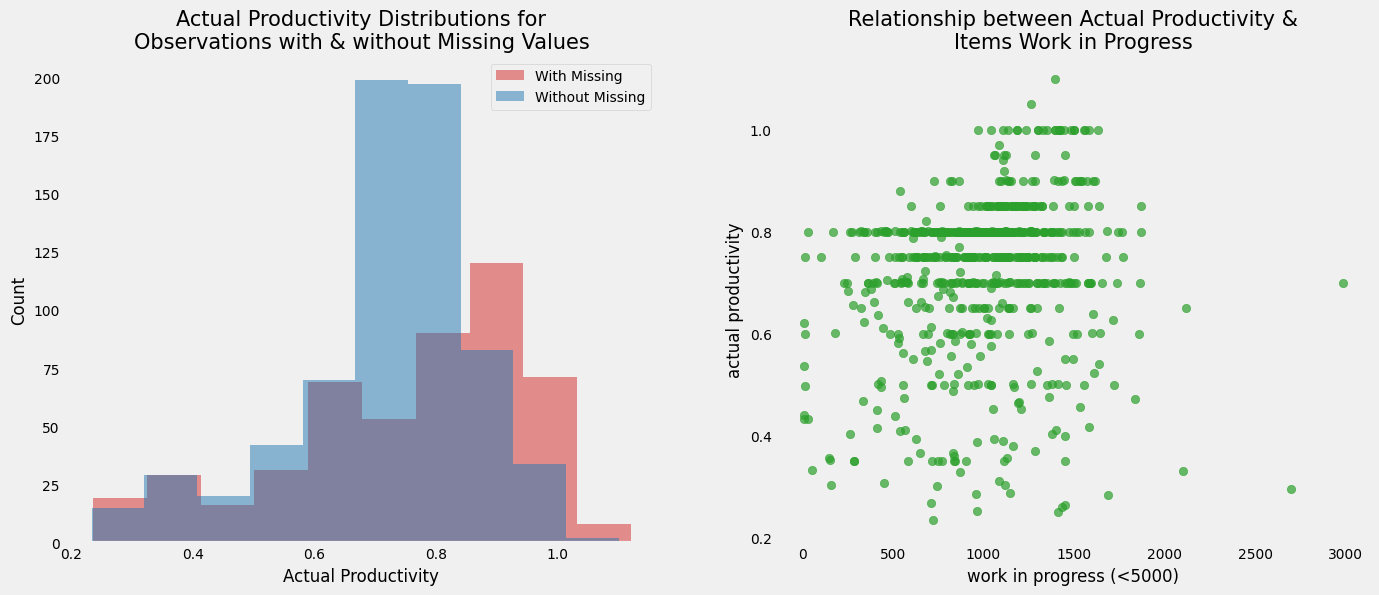

In [234]:
fig = plt.figure(figsize=(15,6))
# Examine values of response variable for the observations with missing values
response_miss = Xy.loc[Xy.isna().sum(axis=1)>0,:]['actual_productivity'] # response for observations with missing values
response_normal = Xy.loc[Xy.isna().sum(axis=1)==0,:]['actual_productivity'] # response for observations with no missing values
fig.add_subplot(1,2,1)
plt.hist(response_miss, alpha=.5, color='tab:red', label='With Missing')
plt.hist(response_normal, alpha=.5, color='tab:blue', label='Without Missing')
plt.legend(fontsize=10)
plt.xlabel("Actual Productivity", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("Count", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(False)
plt.title("Actual Productivity Distributions for\nObservations with & without Missing Values", fontsize=15)
# Actual productivity vs work in progress
fig.add_subplot(1,2,2)
plt.scatter('wip', 'actual_productivity', data=Xy[Xy['wip']<5000], color='tab:green', alpha=.7)
plt.xlabel("work in progress (<5000)", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("actual productivity", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(False)
plt.title("Relationship between Actual Productivity &\nItems Work in Progress", fontsize=15)

plt.show()

&emsp;In the histogram, the observations with missing values in `wip` have more counts among the top end of `actual_productivity`. Since the number of rows with missing `wip` is accountable, manual imputation is made to retain the significant amount of information in the dataset.

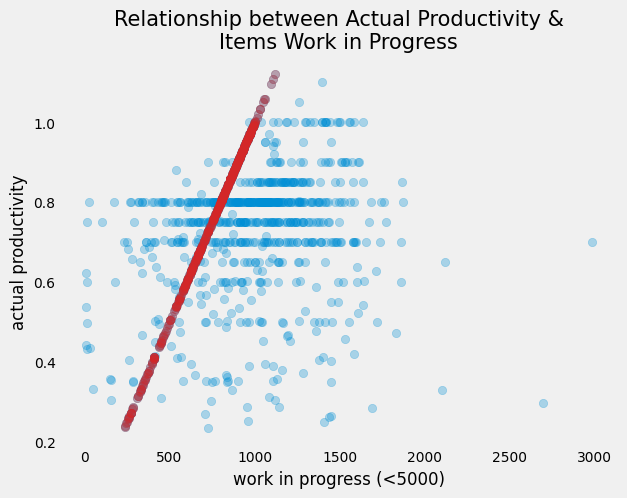

In [235]:
index_miss = Xy.loc[Xy.isna().sum(axis=1)>0,:].index
Xy.loc[Xy.isna().sum(axis=1)>0,'wip'] = Xy['actual_productivity'] * 1000

plt.scatter('wip', 'actual_productivity', data=Xy[Xy['wip']<5000], alpha=.3)
plt.scatter('wip', 'actual_productivity', data=Xy.iloc[index_miss,:], color='tab:red', alpha=.3)
plt.xlabel("work in progress (<5000)", fontsize=12)
plt.xticks(fontsize=10)
plt.ylabel("actual productivity", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(False)
plt.title("Relationship between Actual Productivity &\nItems Work in Progress", fontsize=15)

plt.show()

&emsp;The red data points represent the imputed values for `wip`.

## Numeric Features<a id='numeric'></a>

In [236]:
# numeric features
nums = ['date', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']
# categorical features
cats = ['quarter', 'department', 'day', 'team', 'no_of_style_change']

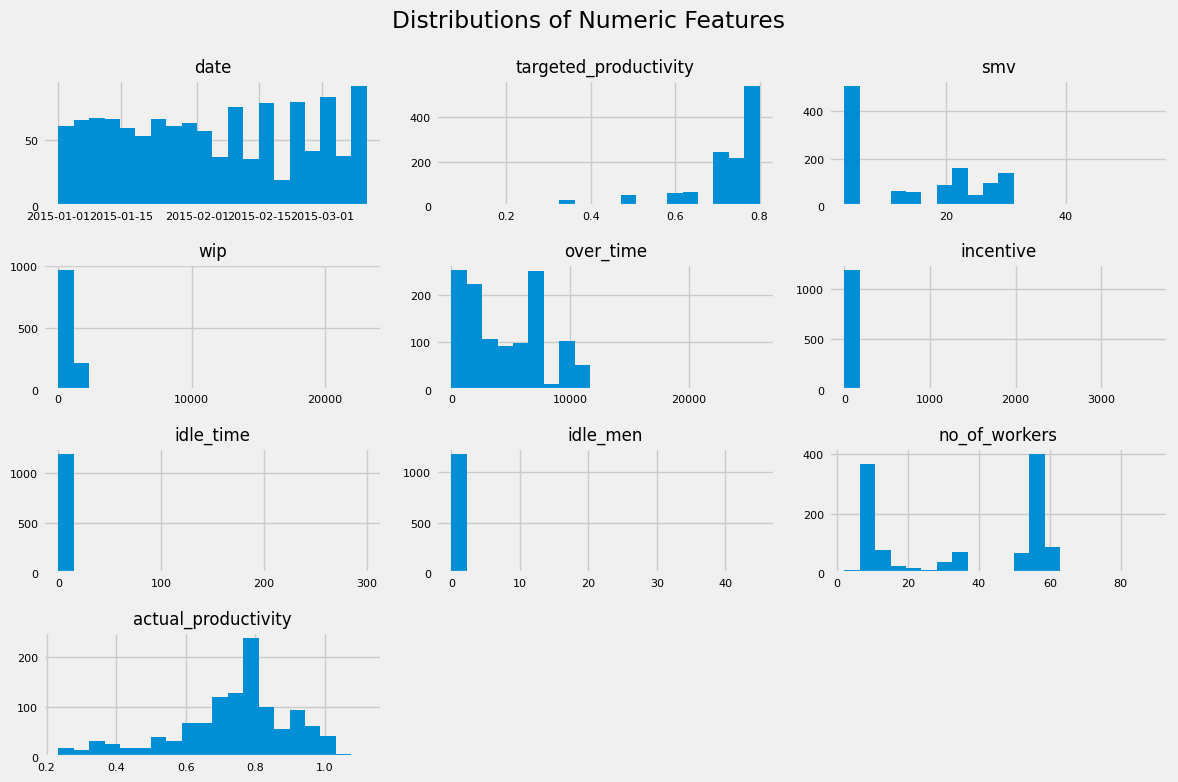

In [237]:
# Begins with distributions in histograms
fig = Xy[nums].hist(figsize=(12,8), xlabelsize=8, ylabelsize=8, bins=20)
[x.title.set_size(12) for x in fig.ravel()]
plt.suptitle("Distributions of Numeric Features")
plt.tight_layout()
plt.show()

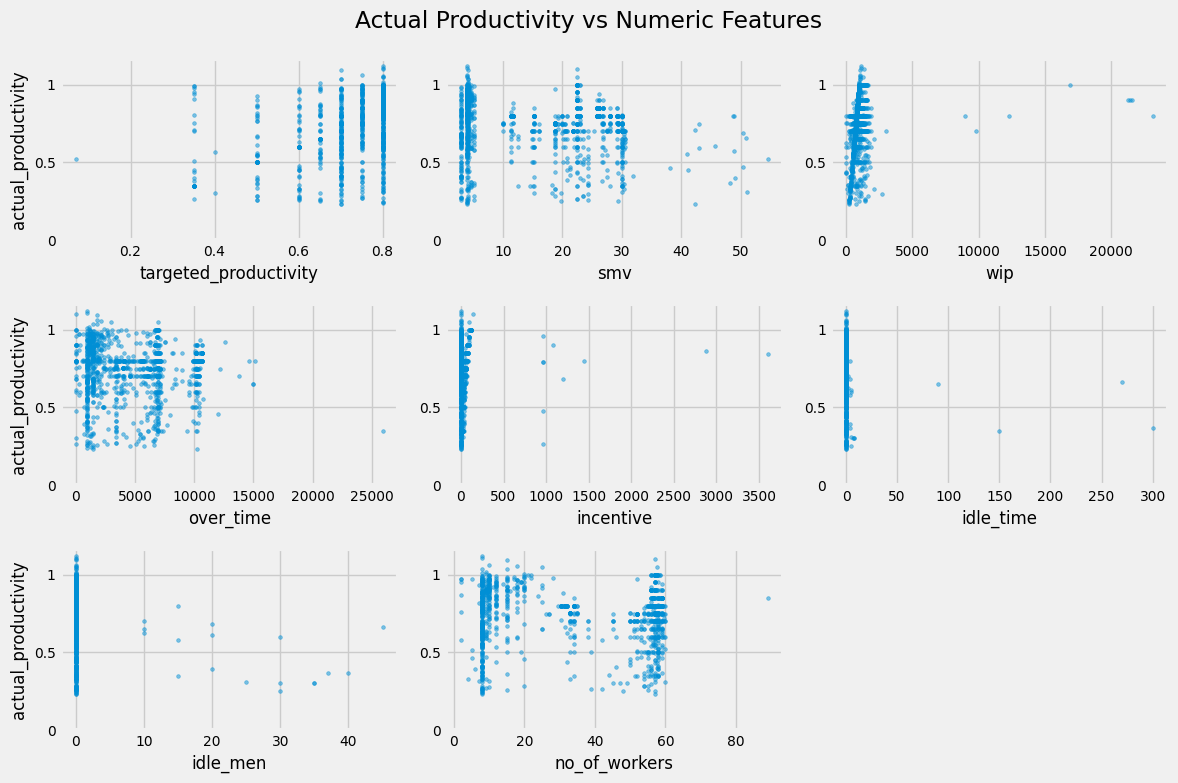

In [238]:
# Relationships between response variable vs numeric features
fig, axes = plt.subplots(3,3, figsize=(12,8))
for i, n in enumerate(nums[1:-1]):
    ax = axes.ravel()[i]
    ax.scatter(n, "actual_productivity", data=Xy, alpha=.5, s=7)
    if i%3 == 0:
        ax.set_ylabel("actual_productivity", fontsize=12)
    ax.set_yticks([0, .5, 1], [0, .5, 1], fontsize=10)
    ax.tick_params(axis='x', labelsize=10)
    ax.set_xlabel(n, fontsize=12)
for i in range(len(nums[1:-1]),9):
    ax = axes.ravel()[i]
    ax.set(xticks=[], yticks=[])
fig.suptitle("Actual Productivity vs Numeric Features")
fig.tight_layout()
plt.show()

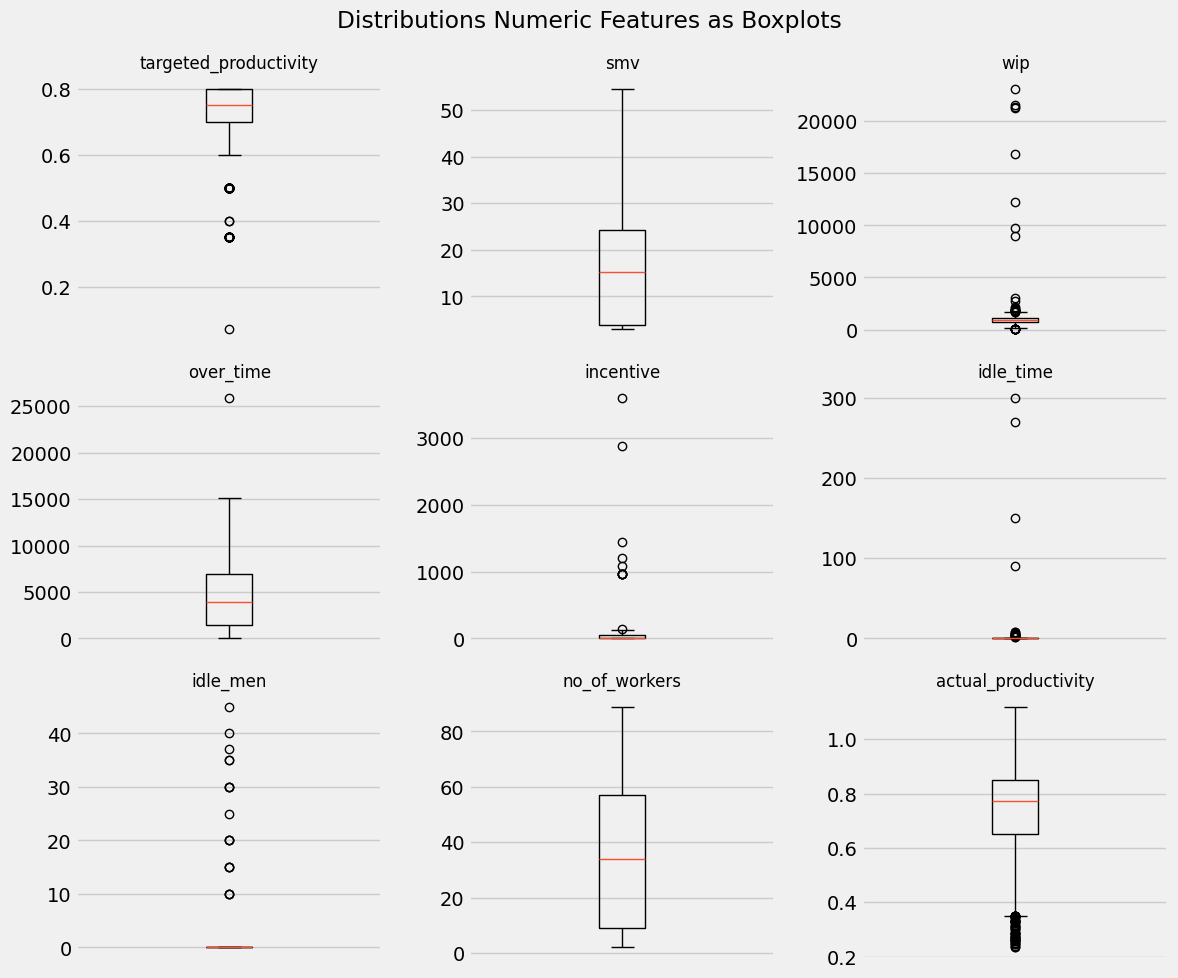

In [239]:
# Relationships between response variable vs numeric features
fig, axes = plt.subplots(3,3, figsize=(12,10))
for i, n in enumerate(nums[1:]):
    ax = axes.ravel()[i]
    ax.boxplot(n, data=Xy, )
    ax.set_xticks([])
    ax.set_title(n, fontsize=12)
fig.suptitle("Distributions Numeric Features as Boxplots")
fig.tight_layout()
plt.show()